In [3]:
#Data Observations

#1 Capomulin and Ramicane are both effective treatments. 
#2 Mouse x401 had the greatest reduction in tumor size in the first 10 days.
#3 Infubinol was the least effective at shrinking tumor sizes.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
 # Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count

249

In [6]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
all_dup_mice_id = pd.DataFrame(duplicate_mice)
all_dup_mice_id

,0
0,g989


In [8]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mice)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = cleaned_df["Mouse ID"].nunique()
clean_mice_count

248

In [10]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

drug_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

drug_var = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

drug_std = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

drug_sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

drug_stat_table = pd.DataFrame({"Mean":drug_mean,
                               "Median":drug_median,
                               "Variance":drug_var,
                               "Standard Deviation":drug_std,
                               "SEM":drug_sem})

drug_stat_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_summary =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

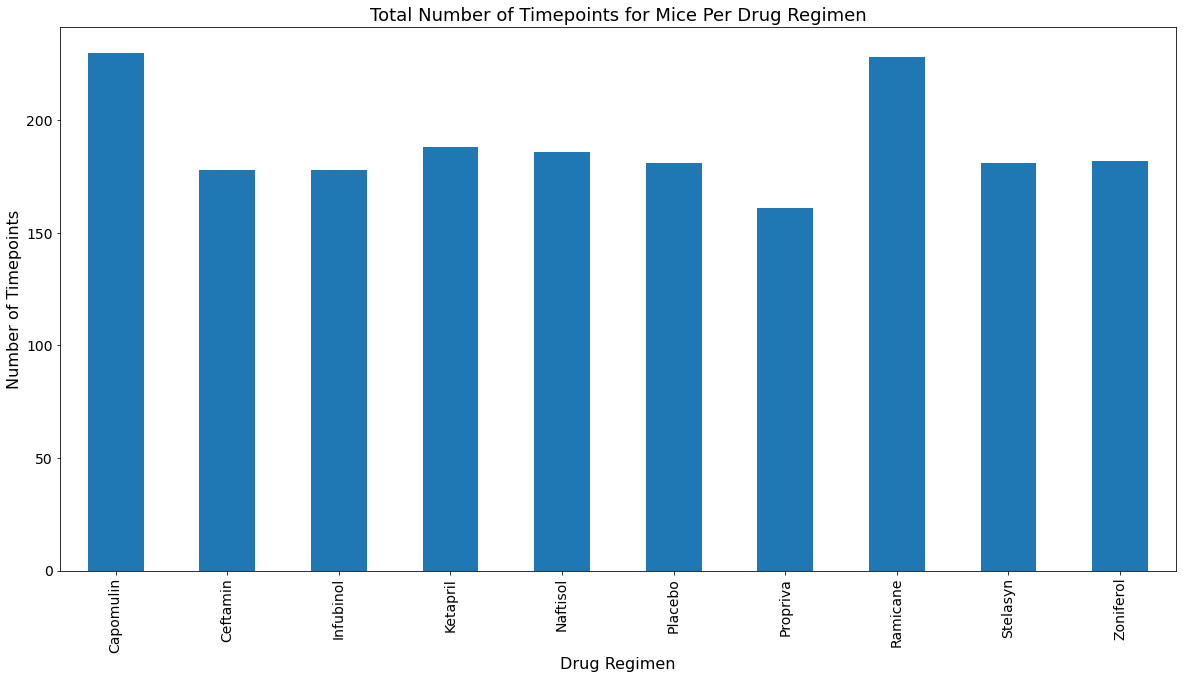

In [12]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_timepoints = mouse_study.groupby(["Drug Regimen"]).count()["Timepoint"]

pandas_plot = tot_timepoints.plot.bar(figsize=(20,10), fontsize=14)
tot_timepoints
plt.title("Total Number of Timepoints for Mice Per Drug Regimen", fontsize=18)
plt.xlabel("Drug Regimen", fontsize= 16)
plt.ylabel("Number of Timepoints", fontsize=16)

plt.show()

Text(0, 0.5, 'Number of Timepoints')

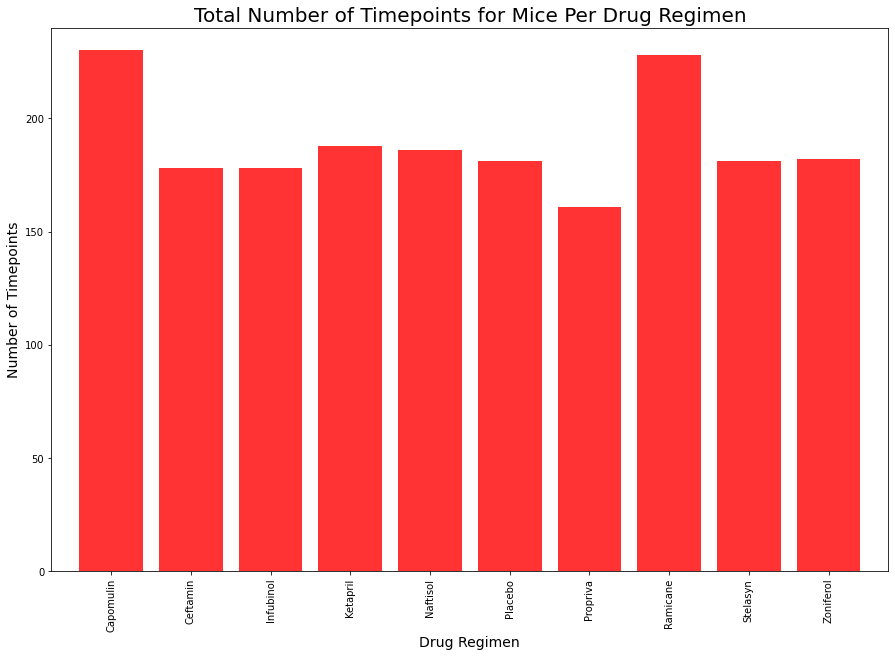

In [13]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Timepoint_list =(mouse_study.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()

x_axis = np.arange(len(tot_timepoints))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, Timepoint_list, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Timepoint_list)+10)

plt.title("Total Number of Timepoints for Mice Per Drug Regimen",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Timepoints",fontsize = 14)



In [14]:
male_female_separate = mouse_study.groupby(["Mouse ID", "Sex"])

gender_df = pd.DataFrame(male_female_separate.size())

mouse_sex= pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Count"]

mouse_sex["Percentage of Sex"] = (100*(mouse_sex["Total Count"]/mouse_sex["Total Count"].sum()))



Text(0.5, 1.0, 'Male-Female Mouse Distribution')

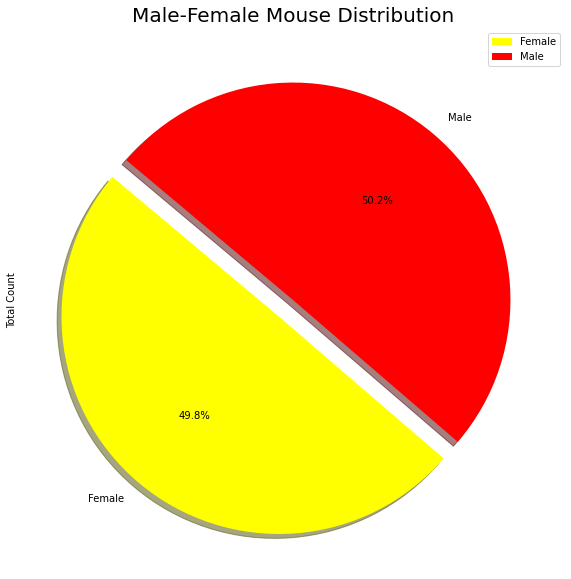

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['yellow', 'red']
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")



plt.title('Male-Female Mouse Distribution',fontsize = 20)


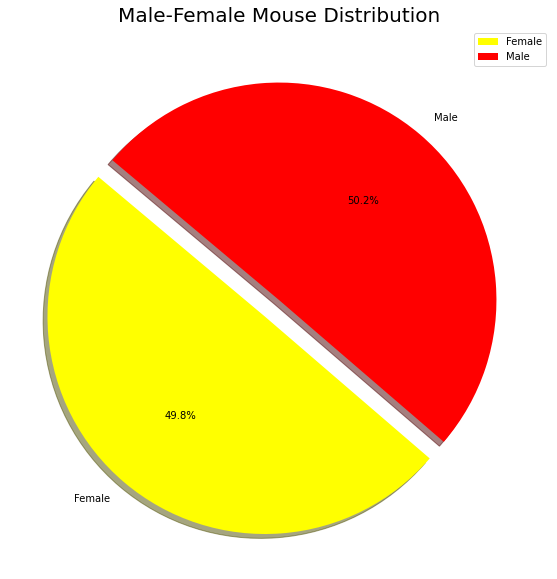

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['yellow', 'red']
explode = (0.1, 0)


fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male-Female Mouse Distribution',fontsize = 20)
plt.legend(loc='best')

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merge_df = pd.merge(mouse_study, greatest_timepoint_df, on='Mouse ID')
tumor_merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [18]:
 # Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    
    #Locate the rows which contain mice on each drug and get the tumor volumes 
    
    drug_df = tumor_merge_df.loc[tumor_merge_df['Drug Regimen'] == treatment]
    
    #add subset 
    
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Max Timepoint']]
    
    #create a series that lists all final tumor values
    values = final_volume_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(values)
    

    #Determine outliers using upper and lower bounds
    
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f'IQR for {treatment}: {iqr}')
    
    #find upper and lower bounds to identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()



IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


([<matplotlib.axis.XTick at 0x7fbf48079a00>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

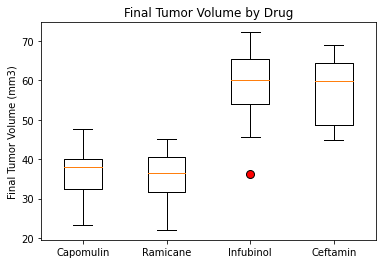

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(tumor_vol_data, flierprops=flierprops)

#labels
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

Text(0.5, 1.0, 'Capomulin Treatment of Mouse x401')

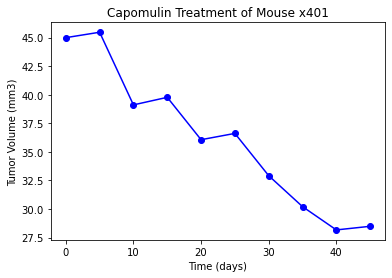

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_merge_df.loc[tumor_merge_df['Drug Regimen'] == 'Capomulin'].head(10)

mouse = tumor_merge_df.loc[tumor_merge_df['Mouse ID'] == 'x401']


#Plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

Text(0.5, 1.0, 'Average Tumor Volume by Weight')

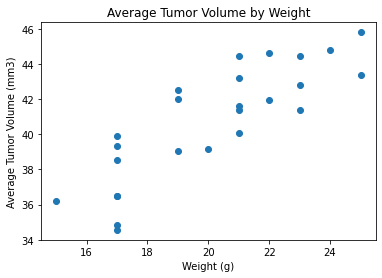

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
average_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

average_volume_df = pd.merge(capomulin_df, average_volume_df, on='Mouse ID')
final_avg_vol_df = average_volume_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['Average Tumor Volume']

plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

The correlation coefficient between weight and tumor volume of mics on Capomulin is: 0.84.


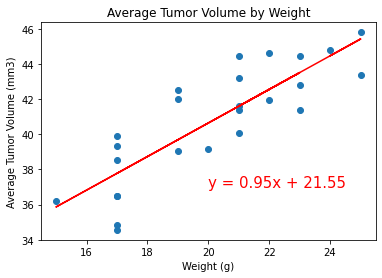

In [35]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coef = round(st.pearsonr(x_data, y_data)[0],2)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter and linear regression
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

print(f"The correlation coefficient between weight and tumor volume of mics on Capomulin is: {correlation_coef}.")

(0.841936342469472, 1.3225722434712483e-07)